In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('train_data.csv')

In [3]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# sns.countplot(x = 'Property_Area', hue="Loan_Status", data=data)
# plt.title('Frequency of loan approval status based on Property Area')

In [5]:
#data['Dependents']=data['Dependents'].fillna(0)

In [6]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [7]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [8]:
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [9]:
data=data.drop(columns='Loan_ID')
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0,1
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0,1
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,1


In [10]:
target = data["Loan_Status_Y"]

In [11]:
feature_names=data.columns

In [12]:
data_new = data.drop("Loan_Status_Y", axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data_new, target, random_state=42)

In [14]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7662337662337663

In [15]:
len(X_train)
len(y_train)

460

In [16]:
len(y_train)

460

In [17]:
# importance probability 
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.26958844882769695, 'Credit_History'),
 (0.19480844875794787, 'ApplicantIncome'),
 (0.18195045843291205, 'LoanAmount'),
 (0.10739310508266882, 'CoapplicantIncome'),
 (0.049855443127511175, 'Loan_Amount_Term'),
 (0.03115797222103435, 'Property_Area_Semiurban'),
 (0.02806050566018092, 'Married_Yes'),
 (0.02297317892180148, 'Education_Not Graduate'),
 (0.022796929727873994, 'Property_Area_Urban'),
 (0.021888195899678678, 'Gender_Male'),
 (0.019504613366342287, 'Dependents_1'),
 (0.019215068206790305, 'Self_Employed_Yes'),
 (0.01667376610036009, 'Dependents_2'),
 (0.014133865667201227, 'Dependents_3+')]

In [18]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")


Training Data Score: 0.8195652173913044
Testing Data Score: 0.7727272727272727


In [21]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1 1 1 1 1 1 1 1 1 1]
First 10 Actual labels: [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [22]:
prediction_df=pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
prediction_df

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
149,1,1
150,1,1
151,1,1
152,0,0


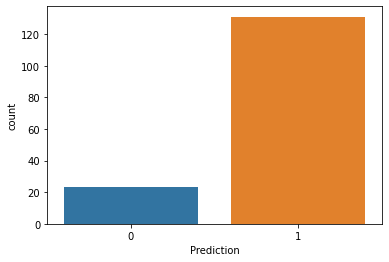

In [23]:
sns.countplot(prediction_df['Prediction'])

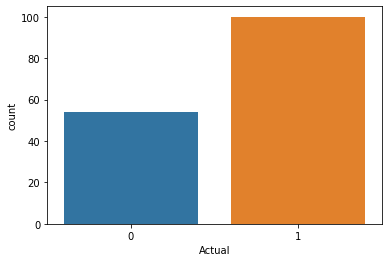

In [24]:
sns.countplot(prediction_df['Actual'])

In [25]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [26]:
# Transform the training and testing data using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 output

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=14))
model.add(Dense(units=2, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [29]:
y_train=to_categorical(y_train)

In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)


Epoch 1/1000
15/15 - 1s - loss: 1.0251 - accuracy: 0.4022
Epoch 2/1000
15/15 - 0s - loss: 0.9542 - accuracy: 0.4217
Epoch 3/1000
15/15 - 0s - loss: 0.8935 - accuracy: 0.4543
Epoch 4/1000
15/15 - 0s - loss: 0.8411 - accuracy: 0.4913
Epoch 5/1000
15/15 - 0s - loss: 0.7977 - accuracy: 0.5196
Epoch 6/1000
15/15 - 0s - loss: 0.7604 - accuracy: 0.5413
Epoch 7/1000
15/15 - 0s - loss: 0.7290 - accuracy: 0.5674
Epoch 8/1000
15/15 - 0s - loss: 0.7005 - accuracy: 0.5783
Epoch 9/1000
15/15 - 0s - loss: 0.6761 - accuracy: 0.5848
Epoch 10/1000
15/15 - 0s - loss: 0.6556 - accuracy: 0.6087
Epoch 11/1000
15/15 - 0s - loss: 0.6378 - accuracy: 0.6435
Epoch 12/1000
15/15 - 0s - loss: 0.6218 - accuracy: 0.6783
Epoch 13/1000
15/15 - 0s - loss: 0.6079 - accuracy: 0.7109
Epoch 14/1000
15/15 - 0s - loss: 0.5950 - accuracy: 0.7326
Epoch 15/1000
15/15 - 0s - loss: 0.5839 - accuracy: 0.7478
Epoch 16/1000
15/15 - 0s - loss: 0.5732 - accuracy: 0.7696
Epoch 17/1000
15/15 - 0s - loss: 0.5637 - accuracy: 0.7717
Epoch 

Epoch 140/1000
15/15 - 0s - loss: 0.4131 - accuracy: 0.8261
Epoch 141/1000
15/15 - 0s - loss: 0.4129 - accuracy: 0.8261
Epoch 142/1000
15/15 - 0s - loss: 0.4127 - accuracy: 0.8261
Epoch 143/1000
15/15 - 0s - loss: 0.4127 - accuracy: 0.8261
Epoch 144/1000
15/15 - 0s - loss: 0.4125 - accuracy: 0.8261
Epoch 145/1000
15/15 - 0s - loss: 0.4121 - accuracy: 0.8261
Epoch 146/1000
15/15 - 0s - loss: 0.4123 - accuracy: 0.8261
Epoch 147/1000
15/15 - 0s - loss: 0.4120 - accuracy: 0.8261
Epoch 148/1000
15/15 - 0s - loss: 0.4116 - accuracy: 0.8261
Epoch 149/1000
15/15 - 0s - loss: 0.4116 - accuracy: 0.8261
Epoch 150/1000
15/15 - 0s - loss: 0.4111 - accuracy: 0.8261
Epoch 151/1000
15/15 - 0s - loss: 0.4111 - accuracy: 0.8283
Epoch 152/1000
15/15 - 0s - loss: 0.4108 - accuracy: 0.8283
Epoch 153/1000
15/15 - 0s - loss: 0.4106 - accuracy: 0.8283
Epoch 154/1000
15/15 - 0s - loss: 0.4103 - accuracy: 0.8304
Epoch 155/1000
15/15 - 0s - loss: 0.4100 - accuracy: 0.8304
Epoch 156/1000
15/15 - 0s - loss: 0.4099

Epoch 277/1000
15/15 - 0s - loss: 0.3850 - accuracy: 0.8413
Epoch 278/1000
15/15 - 0s - loss: 0.3850 - accuracy: 0.8413
Epoch 279/1000
15/15 - 0s - loss: 0.3849 - accuracy: 0.8413
Epoch 280/1000
15/15 - 0s - loss: 0.3846 - accuracy: 0.8413
Epoch 281/1000
15/15 - 0s - loss: 0.3846 - accuracy: 0.8413
Epoch 282/1000
15/15 - 0s - loss: 0.3846 - accuracy: 0.8413
Epoch 283/1000
15/15 - 0s - loss: 0.3843 - accuracy: 0.8413
Epoch 284/1000
15/15 - 0s - loss: 0.3841 - accuracy: 0.8413
Epoch 285/1000
15/15 - 0s - loss: 0.3838 - accuracy: 0.8413
Epoch 286/1000
15/15 - 0s - loss: 0.3838 - accuracy: 0.8413
Epoch 287/1000
15/15 - 0s - loss: 0.3840 - accuracy: 0.8413
Epoch 288/1000
15/15 - 0s - loss: 0.3834 - accuracy: 0.8413
Epoch 289/1000
15/15 - 0s - loss: 0.3835 - accuracy: 0.8413
Epoch 290/1000
15/15 - 0s - loss: 0.3831 - accuracy: 0.8413
Epoch 291/1000
15/15 - 0s - loss: 0.3833 - accuracy: 0.8413
Epoch 292/1000
15/15 - 0s - loss: 0.3828 - accuracy: 0.8413
Epoch 293/1000
15/15 - 0s - loss: 0.3829

Epoch 414/1000
15/15 - 0s - loss: 0.3677 - accuracy: 0.8413
Epoch 415/1000
15/15 - 0s - loss: 0.3675 - accuracy: 0.8413
Epoch 416/1000
15/15 - 0s - loss: 0.3671 - accuracy: 0.8435
Epoch 417/1000
15/15 - 0s - loss: 0.3667 - accuracy: 0.8435
Epoch 418/1000
15/15 - 0s - loss: 0.3671 - accuracy: 0.8457
Epoch 419/1000
15/15 - 0s - loss: 0.3672 - accuracy: 0.8435
Epoch 420/1000
15/15 - 0s - loss: 0.3666 - accuracy: 0.8413
Epoch 421/1000
15/15 - 0s - loss: 0.3664 - accuracy: 0.8391
Epoch 422/1000
15/15 - 0s - loss: 0.3663 - accuracy: 0.8457
Epoch 423/1000
15/15 - 0s - loss: 0.3662 - accuracy: 0.8435
Epoch 424/1000
15/15 - 0s - loss: 0.3665 - accuracy: 0.8413
Epoch 425/1000
15/15 - 0s - loss: 0.3663 - accuracy: 0.8413
Epoch 426/1000
15/15 - 0s - loss: 0.3659 - accuracy: 0.8413
Epoch 427/1000
15/15 - 0s - loss: 0.3659 - accuracy: 0.8413
Epoch 428/1000
15/15 - 0s - loss: 0.3656 - accuracy: 0.8435
Epoch 429/1000
15/15 - 0s - loss: 0.3658 - accuracy: 0.8478
Epoch 430/1000
15/15 - 0s - loss: 0.3656

Epoch 551/1000
15/15 - 0s - loss: 0.3551 - accuracy: 0.8478
Epoch 552/1000
15/15 - 0s - loss: 0.3552 - accuracy: 0.8478
Epoch 553/1000
15/15 - 0s - loss: 0.3547 - accuracy: 0.8478
Epoch 554/1000
15/15 - 0s - loss: 0.3547 - accuracy: 0.8478
Epoch 555/1000
15/15 - 0s - loss: 0.3547 - accuracy: 0.8478
Epoch 556/1000
15/15 - 0s - loss: 0.3547 - accuracy: 0.8478
Epoch 557/1000
15/15 - 0s - loss: 0.3544 - accuracy: 0.8478
Epoch 558/1000
15/15 - 0s - loss: 0.3547 - accuracy: 0.8478
Epoch 559/1000
15/15 - 0s - loss: 0.3543 - accuracy: 0.8478
Epoch 560/1000
15/15 - 0s - loss: 0.3546 - accuracy: 0.8457
Epoch 561/1000
15/15 - 0s - loss: 0.3545 - accuracy: 0.8457
Epoch 562/1000
15/15 - 0s - loss: 0.3544 - accuracy: 0.8457
Epoch 563/1000
15/15 - 0s - loss: 0.3545 - accuracy: 0.8478
Epoch 564/1000
15/15 - 0s - loss: 0.3542 - accuracy: 0.8478
Epoch 565/1000
15/15 - 0s - loss: 0.3540 - accuracy: 0.8478
Epoch 566/1000
15/15 - 0s - loss: 0.3545 - accuracy: 0.8457
Epoch 567/1000
15/15 - 0s - loss: 0.3539

Epoch 688/1000
15/15 - 0s - loss: 0.3471 - accuracy: 0.8543
Epoch 689/1000
15/15 - 0s - loss: 0.3468 - accuracy: 0.8522
Epoch 690/1000
15/15 - 0s - loss: 0.3465 - accuracy: 0.8522
Epoch 691/1000
15/15 - 0s - loss: 0.3468 - accuracy: 0.8500
Epoch 692/1000
15/15 - 0s - loss: 0.3465 - accuracy: 0.8522
Epoch 693/1000
15/15 - 0s - loss: 0.3469 - accuracy: 0.8522
Epoch 694/1000
15/15 - 0s - loss: 0.3468 - accuracy: 0.8543
Epoch 695/1000
15/15 - 0s - loss: 0.3463 - accuracy: 0.8543
Epoch 696/1000
15/15 - 0s - loss: 0.3465 - accuracy: 0.8543
Epoch 697/1000
15/15 - 0s - loss: 0.3464 - accuracy: 0.8565
Epoch 698/1000
15/15 - 0s - loss: 0.3482 - accuracy: 0.8587
Epoch 699/1000
15/15 - 0s - loss: 0.3470 - accuracy: 0.8565
Epoch 700/1000
15/15 - 0s - loss: 0.3463 - accuracy: 0.8565
Epoch 701/1000
15/15 - 0s - loss: 0.3461 - accuracy: 0.8543
Epoch 702/1000
15/15 - 0s - loss: 0.3463 - accuracy: 0.8500
Epoch 703/1000
15/15 - 0s - loss: 0.3465 - accuracy: 0.8565
Epoch 704/1000
15/15 - 0s - loss: 0.3458

Epoch 825/1000
15/15 - 0s - loss: 0.3385 - accuracy: 0.8652
Epoch 826/1000
15/15 - 0s - loss: 0.3384 - accuracy: 0.8652
Epoch 827/1000
15/15 - 0s - loss: 0.3389 - accuracy: 0.8630
Epoch 828/1000
15/15 - 0s - loss: 0.3385 - accuracy: 0.8609
Epoch 829/1000
15/15 - 0s - loss: 0.3385 - accuracy: 0.8652
Epoch 830/1000
15/15 - 0s - loss: 0.3380 - accuracy: 0.8652
Epoch 831/1000
15/15 - 0s - loss: 0.3383 - accuracy: 0.8630
Epoch 832/1000
15/15 - 0s - loss: 0.3383 - accuracy: 0.8630
Epoch 833/1000
15/15 - 0s - loss: 0.3381 - accuracy: 0.8609
Epoch 834/1000
15/15 - 0s - loss: 0.3379 - accuracy: 0.8652
Epoch 835/1000
15/15 - 0s - loss: 0.3381 - accuracy: 0.8652
Epoch 836/1000
15/15 - 0s - loss: 0.3379 - accuracy: 0.8652
Epoch 837/1000
15/15 - 0s - loss: 0.3382 - accuracy: 0.8630
Epoch 838/1000
15/15 - 0s - loss: 0.3378 - accuracy: 0.8652
Epoch 839/1000
15/15 - 0s - loss: 0.3379 - accuracy: 0.8630
Epoch 840/1000
15/15 - 0s - loss: 0.3379 - accuracy: 0.8609
Epoch 841/1000
15/15 - 0s - loss: 0.3376

Epoch 962/1000
15/15 - 0s - loss: 0.3342 - accuracy: 0.8717
Epoch 963/1000
15/15 - 0s - loss: 0.3339 - accuracy: 0.8696
Epoch 964/1000
15/15 - 0s - loss: 0.3341 - accuracy: 0.8696
Epoch 965/1000
15/15 - 0s - loss: 0.3341 - accuracy: 0.8717
Epoch 966/1000
15/15 - 0s - loss: 0.3337 - accuracy: 0.8696
Epoch 967/1000
15/15 - 0s - loss: 0.3335 - accuracy: 0.8674
Epoch 968/1000
15/15 - 0s - loss: 0.3336 - accuracy: 0.8696
Epoch 969/1000
15/15 - 0s - loss: 0.3340 - accuracy: 0.8696
Epoch 970/1000
15/15 - 0s - loss: 0.3334 - accuracy: 0.8696
Epoch 971/1000
15/15 - 0s - loss: 0.3341 - accuracy: 0.8696
Epoch 972/1000
15/15 - 0s - loss: 0.3342 - accuracy: 0.8717
Epoch 973/1000
15/15 - 0s - loss: 0.3338 - accuracy: 0.8717
Epoch 974/1000
15/15 - 0s - loss: 0.3336 - accuracy: 0.8717
Epoch 975/1000
15/15 - 0s - loss: 0.3333 - accuracy: 0.8717
Epoch 976/1000
15/15 - 0s - loss: 0.3334 - accuracy: 0.8696
Epoch 977/1000
15/15 - 0s - loss: 0.3335 - accuracy: 0.8717
Epoch 978/1000
15/15 - 0s - loss: 0.3334

In [32]:
y_test=to_categorical(y_test)

In [33]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.6992 - accuracy: 0.7597
Normal Neural Network - Loss: 0.6991727948188782, Accuracy: 0.7597402334213257


In [34]:
prediction=model.predict_classes(X_test_scaled)

In [35]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [36]:
#Line Chart (Amount of Loan)(Decision Boundary)
#Number of depdendents vs loan amount 
from scipy.stats import linregress

In [37]:
def plot_regression(x_values,y_values):
    (slope, intercept, rvalue, pvalue,stderr)=linregress(x_values,y_values)
    predicted_y=slope*x_values+intercept
    line_equation=f"y = {round(slope,2)}x + {round(intercept,2)}"
#     plt.scatter(x_values,y_values, c = 'b')
    plt.plot(x_values,predicted_y,c='r')
#     plot_regression(x_values=np.log(data['LoanAmount']),y_values= np.log(data['ApplicantIncome']))
    plt.title('Loan Amount vs. Applicant Income')
    plt.scatter(x_values,y_values, c='orange')
    plt.xlabel('LoanAmount')
    plt.ylabel('ApplicantIncome')
    plt.grid()


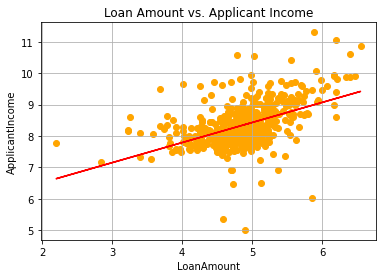

In [38]:
plot_regression(np.log(data['LoanAmount']),np.log(data['ApplicantIncome']))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

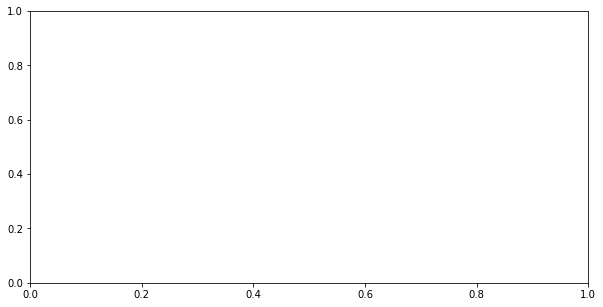

In [45]:
# Numbers of pairs of bars you want
N = 2
# Data on X-axis
# Specify the values of blue bars (height)
blue_bar = (0, 120, 20)
# Specify the values of orange bars (height)
orange_bar = (0, 120, 20)
# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))
# Width of a bar 
width = 0.3       
# Plotting
plt.bar(ind, blue_bar , width, label='Blue bar label')
plt.bar(ind + width, orange_bar, width, label='Orange bar label')
plt.xlabel('Here goes x-axis label')
plt.ylabel('Here goes y-axis label')
plt.title('Here goes title of the plot')
# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Xtick1', 'Xtick2'))
# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()